In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install catboost

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

from scipy.stats import chi2_contingency, spearmanr, skew, pearsonr
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import ParameterGrid
from sklearn.neighbors import KNeighborsClassifier

#SMOTE
from imblearn.over_sampling import SMOTE

#Mô hình XG Boost
import xgboost as xgb
from xgboost import plot_importance
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostClassifier

#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/HDMA Washington State Home Loans, 2016/Washington_State_HDMA-2016.csv')
data.shape

<ipython-input-3-23777f9ab94c>:1: DtypeWarning: Columns (23,24,25,28,29,30,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/Datasets/HDMA Washington State Home Loans, 2016/Washington_State_HDMA-2016.csv')


(466566, 47)

In [ ]:
data.columns

Index(['tract_to_msamd_income', 'rate_spread', 'population',
       'minority_population', 'number_of_owner_occupied_units',
       'number_of_1_to_4_family_units', 'loan_amount_000s',
       'hud_median_family_income', 'applicant_income_000s', 'state_name',
       'state_abbr', 'sequence_number', 'respondent_id', 'purchaser_type_name',
       'property_type_name', 'preapproval_name', 'owner_occupancy_name',
       'msamd_name', 'loan_type_name', 'loan_purpose_name', 'lien_status_name',
       'hoepa_status_name', 'edit_status_name', 'denial_reason_name_3',
       'denial_reason_name_2', 'denial_reason_name_1', 'county_name',
       'co_applicant_sex_name', 'co_applicant_race_name_5',
       'co_applicant_race_name_4', 'co_applicant_race_name_3',
       'co_applicant_race_name_2', 'co_applicant_race_name_1',
       'co_applicant_ethnicity_name', 'census_tract_number', 'as_of_year',
       'application_date_indicator', 'applicant_sex_name',
       'applicant_race_name_5', 'applicant_rac

# **GIẢI THÍCH DỮ LIỆU:**

**tract_to_msamd_income:** Tỷ lệ thu nhập trung bình của khu vực điều tra (census tract) so với thu nhập trung bình của Metropolitan Statistical Area/Metropolitan Division (MSA/MD). Giá trị này thể hiện mức độ giàu có tương đối của khu vực.

**rate_spread:** Chênh lệch lãi suất giữa lãi suất thực tế của khoản vay và lãi suất chuẩn (benchmark rate). Đây là một thước đo để xác định mức độ chênh lệch lãi suất của khoản vay so với các khoản vay chuẩn.

**population:** Tổng số dân cư sinh sống trong khu vực điều tra (census tract) nơi mà tài sản nằm trong đó.

**minority_population:** Tỷ lệ dân số thiểu số (bao gồm các nhóm chủng tộc và sắc tộc khác ngoài người da trắng không phải gốc Tây Ban Nha) trong khu vực điều tra (census tract).

**number_of_owner_occupied_units:** Số lượng các đơn vị nhà ở trong khu vực điều tra (census tract) mà được chủ sở hữu sinh sống và không cho thuê.

**number_of_1_to_4_family_units:** Số lượng đơn vị nhà ở trong khu vực điều tra (census tract) được thiết kế để ở cho từ 1 đến 4 gia đình.

**loan_amount_000s:** Số tiền vay, được thể hiện bằng nghìn đô la (000s). Ví dụ: giá trị 250 tương đương với khoản vay 250,000 USD.

**hud_median_family_income:** Thu nhập trung bình của một gia đình trong khu vực, theo Cục Phát triển Nhà và Đô thị Hoa Kỳ (HUD).

**applicant_income_000s:** Thu nhập của người xin vay, được thể hiện bằng nghìn đô la (000s).

**state_name:** Tên của tiểu bang nơi tài sản đảm bảo khoản vay tọa lạc.

**state_abbr:** Viết tắt của tên tiểu bang (ví dụ: CA cho California, TX cho Texas).

**sequence_number:** Một mã số duy nhất được gán cho mỗi hồ sơ trong tập dữ liệu, dùng để xác định và phân biệt các hồ sơ khác nhau.

**respondent_id:** Mã số nhận dạng duy nhất của tổ chức tài chính đã nộp báo cáo dữ liệu vay thế chấp.

**purchaser_type_name:** Loại tổ chức đã mua lại khoản vay từ tổ chức tài chính ban đầu (nếu có).

**property_type_name:** Loại tài sản được sử dụng làm đảm bảo cho khoản vay, chẳng hạn như nhà ở cho một gia đình, căn hộ, hoặc bất động sản thương mại.

**preapproval_name:** Trạng thái phê duyệt trước của đơn xin vay, cho biết liệu khoản vay có được phê duyệt sơ bộ trước khi hoàn tất quá trình xét duyệt chính thức hay không.

**owner_occupancy_name:** Thông tin về việc người vay có dự định sống trong tài sản đó hay không, hoặc tài sản sẽ được sử dụng như một ngôi nhà thứ hai hoặc bất động sản đầu tư.

**msamd_name:** Tên của Metropolitan Statistical Area hoặc Metropolitan Division nơi tài sản tọa lạc.

**loan_type_name:** Loại hình khoản vay, ví dụ như khoản vay thông thường, khoản vay FHA, VA, hoặc USDA.

**loan_purpose_name:** Mục đích của khoản vay, chẳng hạn như mua nhà, tái tài trợ, hoặc cải tạo nhà ở.

**lien_status_name:** Trạng thái quyền lưu giữ của khoản vay, chỉ ra thứ tự ưu tiên của quyền lợi về khoản vay đối với tài sản (ví dụ: quyền lưu giữ thứ nhất hoặc thứ hai).

**hoepa_status_name:** Trạng thái khoản vay theo Đạo luật Bảo vệ Chủ sở hữu Nhà (HOEPA). Đây là quy định bảo vệ người tiêu dùng đối với các khoản vay có lãi suất và phí cao.

**edit_status_name:** Trạng thái chỉnh sửa của hồ sơ, cho biết liệu hồ sơ có được chỉnh sửa hay không sau khi nộp.

**denial_reason_name_3:** Lý do thứ ba mà đơn xin vay bị từ chối (nếu có).

**denial_reason_name_2:** Lý do thứ hai mà đơn xin vay bị từ chối (nếu có).

**denial_reason_name_1:** Lý do chính mà đơn xin vay bị từ chối.

**county_name:** Tên của quận nơi tài sản nằm trong đó.

**co_applicant_sex_name:** Giới tính của người đồng vay (nếu có).

**co_applicant_race_name_5:** Chủng tộc thứ 5 của người đồng vay (nếu có).

**co_applicant_race_name_4:** Chủng tộc thứ 4 của người đồng vay (nếu có).

**co_applicant_race_name_3:** Chủng tộc thứ 3 của người đồng vay (nếu có).

**co_applicant_race_name_2:** Chủng tộc thứ 2 của người đồng vay (nếu có).

**co_applicant_race_name_1:** Chủng tộc chính của người đồng vay (nếu có).

**co_applicant_ethnicity_name:** Sắc tộc của người đồng vay (nếu có).

**census_tract_number:** Mã số của khu vực điều tra dân số nơi tài sản nằm trong đó.

**as_of_year:** Năm mà dữ liệu được thu thập.

**application_date_indicator:** Chỉ báo ngày nộp đơn xin vay, cho biết liệu ngày nộp đơn có được cung cấp hay không.

**applicant_sex_name:** Giới tính của người xin vay.

**applicant_race_name_5:** Chủng tộc thứ 5 của người xin vay (nếu có).

**applicant_race_name_4:** Chủng tộc thứ 4 của người xin vay (nếu có).

**applicant_race_name_3:** Chủng tộc thứ 3 của người xin vay (nếu có).

**applicant_race_name_2:** Chủng tộc thứ 2 của người xin vay (nếu có).

**applicant_race_name_1:** Chủng tộc chính của người xin vay.

**applicant_ethnicity_name:** Sắc tộc của người xin vay.

**agency_name:** Tên của cơ quan chính phủ hoặc tổ chức giám sát mà tổ chức tài chính phải báo cáo dữ liệu.

**agency_abbr:** Viết tắt tên của cơ quan giám sát.

**action_taken_name:** Kết quả của đơn xin vay, ví dụ như khoản vay được chấp thuận, bị từ chối, hoặc bị rút lại.

# **DATA CHANGING**

In [4]:
#Có nhiều hồ sơ trùng lặp, ta sẽ giữ lại dòng đầu tiên xuất hiện
data = data.drop_duplicates('sequence_number')

***Ở output, ta chỉ giữ lại 3 giá trị là: "Loan originated"/Được phê duyệt, "Application denied by financial institution"/Bị từ chối" và "Application withdrawn by applicant"/Người vay rút lại". Các giá trị khác xóa bớt***

In [5]:
data = data[data['action_taken_name'].isin(['Loan originated', 'Application denied by financial institution', 'Application withdrawn by applicant'])]

In [6]:
data.isnull().sum()

,0
tract_to_msamd_income,35
rate_spread,159173
population,34
minority_population,34
number_of_owner_occupied_units,39
number_of_1_to_4_family_units,35
loan_amount_000s,0
hud_median_family_income,34
applicant_income_000s,15048
state_name,0


In [7]:
#Xóa đi các columns Null quá nhiều, hoặc không có ý nghĩa (do đã có một column khác cung cấp ý nghĩa đó):
data = data.drop(columns = ['applicant_race_name_5', 'applicant_race_name_4', 'applicant_race_name_3', 'applicant_race_name_2',
                            'co_applicant_race_name_5', 'co_applicant_race_name_4', 'co_applicant_race_name_3', 'co_applicant_race_name_2',
                            'denial_reason_name_3', 'denial_reason_name_1', 'denial_reason_name_2', 'rate_spread', 'msamd_name'])

***Đổi toàn bộ các giá trị của "edit_status_name" từ Null sang "Not quality failure"/không có lỗi chỉnh sửa***

In [8]:
data['edit_status_name'] = data['edit_status_name'].fillna('Not quality failure')

In [9]:
data.isnull().sum()

,0
tract_to_msamd_income,35
population,34
minority_population,34
number_of_owner_occupied_units,39
number_of_1_to_4_family_units,35
loan_amount_000s,0
hud_median_family_income,34
applicant_income_000s,15048
state_name,0
state_abbr,0


***Xóa đi các columns có giá trị Null còn lại, trừ 2 column là  "applicant_income_000s" và "msamd_name"***

In [10]:
data = data.dropna(subset = ['tract_to_msamd_income', 'population', 'minority_population', 'number_of_owner_occupied_units',
                              'number_of_1_to_4_family_units', 'hud_median_family_income', 'county_name', 'census_tract_number'])

***Đối với column "applicant_income_000s"/thu nhập người vay ta sẽ tính dựa theo thu nhập trung bình của từng nhóm "hud_median_family_income"/thu nhập dân cư từng vùng, nơi người đó sống***

In [11]:
data.loc[:, 'applicant_income_000s'] = data['applicant_income_000s'].fillna(data.groupby('hud_median_family_income')['applicant_income_000s'].transform('mean'))

***Vậy là dữ liệu đã hết NaN***

In [12]:
data.describe()

,tract_to_msamd_income,population,minority_population,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount_000s,hud_median_family_income,applicant_income_000s,sequence_number,census_tract_number,as_of_year,application_date_indicator
count,162506.000000,162506.000000,162506.000000,162506.000000,162506.000000,162506.000000,162506.000000,162506.000000,1.625060e+05,162506.000000,162506.0,162506.0
mean,107.487666,5290.732385,25.039578,1391.246182,1828.779627,302.430009,76858.010166,113.797564,2.036506e+05,1493.446311,2016.0,0.0
std,29.650588,1660.695263,15.184299,506.159491,696.600562,729.139513,13207.374552,125.429586,2.206878e+05,3056.362866,0.0,0.0
min,14.050000,98.000000,2.040000,15.000000,27.000000,1.000000,48700.000000,1.000000,1.000000e+00,1.000000,2016.0,0.0
25%,87.480003,4127.000000,13.310000,1034.000000,1400.000000,175.000000,65800.000000,62.000000,4.330700e+04,119.000000,2016.0,0.0
50%,105.029999,5175.000000,21.110001,1359.000000,1732.000000,248.000000,73600.000000,93.669310,1.123785e+05,326.020000,2016.0,0.0
75%,124.900002,6339.000000,32.810001,1705.000000,2175.000000,350.000000,90300.000000,135.000000,3.016098e+05,704.030000,2016.0,0.0
max,257.140015,13025.000000,94.790001,2997.000000,5893.000000,99999.000000,90300.000000,9999.000000,1.241754e+06,9757.000000,2016.0,0.0


***Dễ thấy, ở 2 columns là loan_amount_000s, applicant_income_000s có các giá trị bất thường, ta sẽ loại bỏ các giá trị này; Tuy nhiên về sau ta sẽ tiến hành thanh lọc các giá trị ngoại lệ nữa***

In [13]:
data = data[data['loan_amount_000s']!= 99999]
data = data[data['applicant_income_000s'] != 9999]

# **OULIERS DROPPING**

In [14]:
#Tính toán Skewness cho các cols:
skew_cols = ['loan_amount_000s', 'hud_median_family_income', 'applicant_income_000s']
for i in skew_cols:
  print(i, data[i].skew())

loan_amount_000s 54.850855045992766
hud_median_family_income -0.35777964744598345
applicant_income_000s 16.889464285862825


In [15]:
#Tính toán IQR cho dữ liệu phân phối không chuẩn
IQR_list = ['loan_amount_000s', 'applicant_income_000s']

for i in IQR_list:
  #tính toán IQR thông qua Q1,
  Q1 = data[i].quantile(0.25)
  Q3 = data[i].quantile(0.75)
  IQR = Q3 - Q1

  # Xác định ngưỡng cho giá trị ngoại lệ
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Nếu bạn muốn loại bỏ các giá trị ngoại lệ
  data = data[(data[i] >= lower_bound) & (data[i] <= upper_bound)]

print("Dữ liệu sau khi loại bỏ Outliers sử dụng IQR:")
print(data.shape)

Dữ liệu sau khi loại bỏ Outliers sử dụng IQR:
(148177, 34)


In [16]:
#Tiếp tục xóa đi các columns chỉ có 1 giá trị duy nhất:
data = data.drop(columns = ['state_name', 'state_abbr', 'as_of_year', 'application_date_indicator', 'hoepa_status_name', 'agency_name'])

In [17]:
#Dữ liệu hoàn chỉnh sau khi đã tiền xử lý:
data

,tract_to_msamd_income,population,minority_population,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount_000s,hud_median_family_income,applicant_income_000s,sequence_number,respondent_id,purchaser_type_name,property_type_name,preapproval_name,owner_occupancy_name,loan_type_name,loan_purpose_name,lien_status_name,edit_status_name,county_name,co_applicant_sex_name,co_applicant_race_name_1,co_applicant_ethnicity_name,census_tract_number,applicant_sex_name,applicant_race_name_1,applicant_ethnicity_name,agency_abbr,action_taken_name
0,121.690002,8381.0,23.790001,2175.0,2660.0,227,73300.0,116.000000,119969,480228,Freddie Mac (FHLMC),One-to-four family dwelling (other than manufa...,Not applicable,Owner-occupied as a principal dwelling,Conventional,Refinancing,Secured by a first lien,Not quality failure,Clark County,Male,"Information not provided by applicant in mail,...",Not Hispanic or Latino,413.27,Female,"Information not provided by applicant in mail,...",Not Hispanic or Latino,CFPB,Loan originated
1,83.370003,4915.0,23.990000,1268.0,1777.0,240,57900.0,42.000000,52605,7257500009,"Life insurance company, credit union, mortgage...",One-to-four family dwelling (other than manufa...,Not applicable,Owner-occupied as a principal dwelling,FHA-insured,Home purchase,Secured by a first lien,Not quality failure,Walla Walla County,No co-applicant,No co-applicant,No co-applicant,9208.01,Male,White,Hispanic or Latino,HUD,Loan originated
2,91.129997,5075.0,11.820000,1136.0,1838.0,241,73300.0,117.000000,6210,72-1545376,Loan was not originated or was not sold in cal...,One-to-four family dwelling (other than manufa...,Not applicable,Owner-occupied as a principal dwelling,Conventional,Refinancing,Secured by a first lien,Not quality failure,Clark County,Female,White,Not Hispanic or Latino,414.00,Male,White,Not Hispanic or Latino,HUD,Loan originated
4,162.470001,5183.0,10.500000,1705.0,2104.0,417,78100.0,114.000000,32582,32489,Freddie Mac (FHLMC),One-to-four family dwelling (other than manufa...,Not applicable,Owner-occupied as a principal dwelling,Conventional,Home improvement,Secured by a first lien,Not quality failure,Kitsap County,Male,White,Not Hispanic or Latino,907.00,Female,White,Not Hispanic or Latino,FDIC,Loan originated
5,119.629997,4775.0,18.889999,954.0,1332.0,206,72300.0,98.201983,6270,24671,"Life insurance company, credit union, mortgage...",One-to-four family dwelling (other than manufa...,Not applicable,Owner-occupied as a principal dwelling,VA-guaranteed,Refinancing,Secured by a first lien,Quality edit failure only,Pierce County,No co-applicant,No co-applicant,No co-applicant,734.06,Male,White,Not Hispanic or Latino,OCC,Loan originated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427433,97.120003,5103.0,16.190001,1167.0,1440.0,320,69900.0,108.000000,553904,451965,Loan was not originated or was not sold in cal...,One-to-four family dwelling (other than manufa...,Not applicable,Owner-occupied as a principal dwelling,Conventional,Refinancing,Secured by a first lien,Not quality failure,Whatcom County,Female,White,Not Hispanic or Latino,103.03,Male,White,Not Hispanic or Latino,CFPB,Application withdrawn by applicant
427438,137.809998,6642.0,12.510000,2045.0,2537.0,349,69900.0,215.000000,483354,451965,Loan was not originated or was not sold in cal...,One-to-four family dwelling (other than manufa...,Not applicable,Owner-occupied as a principal dwelling,Conventional,Refinancing,Secured by a first lien,Not quality failure,Whatcom County,Female,White,Not Hispanic or Latino,8.04,Male,White,Not Hispanic or Latino,CFPB,Application withdrawn by applicant
427443,132.639999,6637.0,9.100000,2039.0,2580.0,150,69900.0,45.000000,456903,451965,Loan was not originated or was not sold in cal...,One-to-four family dwelling (other than manufa...,Not applicable,Owner-occupied as a principal dwelling,Conventional,Home purchase,Secured by a first lien,Not quality fai

# **EDA**

In [18]:
category_cols = ['purchaser_type_name', 'property_type_name', 'preapproval_name', 'owner_occupancy_name', 'loan_type_name',
                 'loan_purpose_name', 'lien_status_name', 'hoepa_status_name', 'edit_status_name', 'county_name',
                 'co_applicant_sex_name', 'co_applicant_race_name_1', 'co_applicant_ethnicity_name', 'census_tract_number',
                 'applicant_sex_name', 'applicant_race_name_1', 'applicant_ethnicity_name', 'agency_name', 'agency_abbr', 'action_taken_name']

numeric_cols = ['tract_to_msamd_income', 'population', 'minority_population', 'number_of_owner_occupied_units',
                'number_of_1_to_4_family_units', 'loan_amount_000s', 'hud_median_family_income', 'applicant_income_000s']

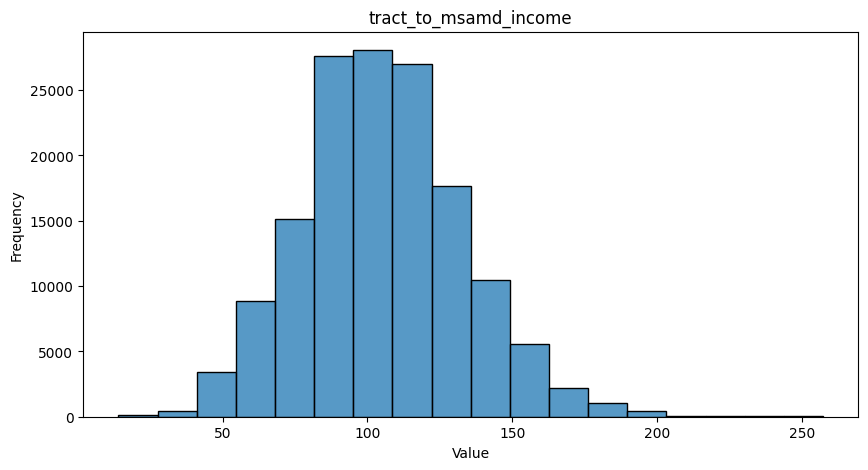

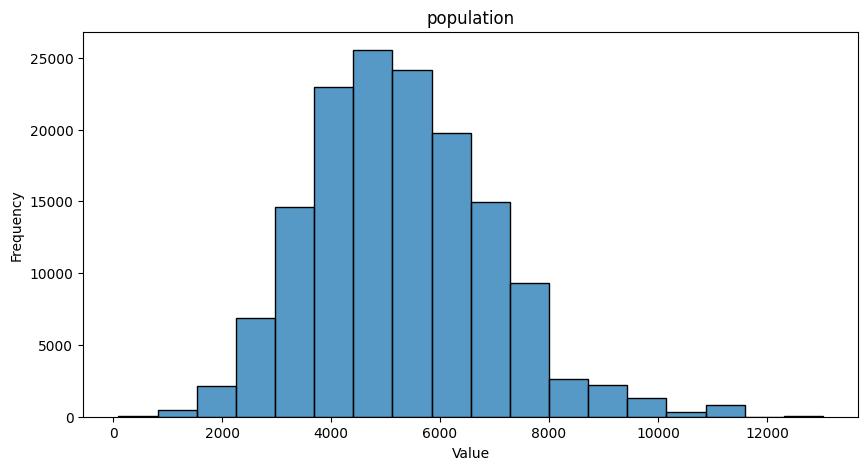

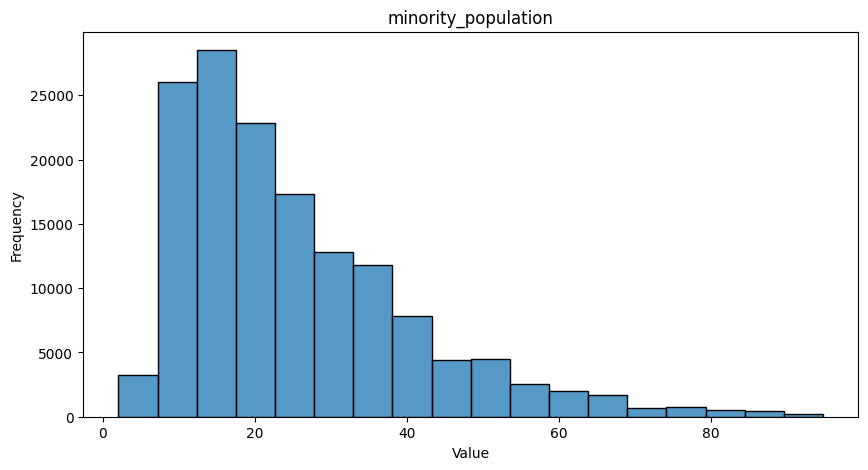

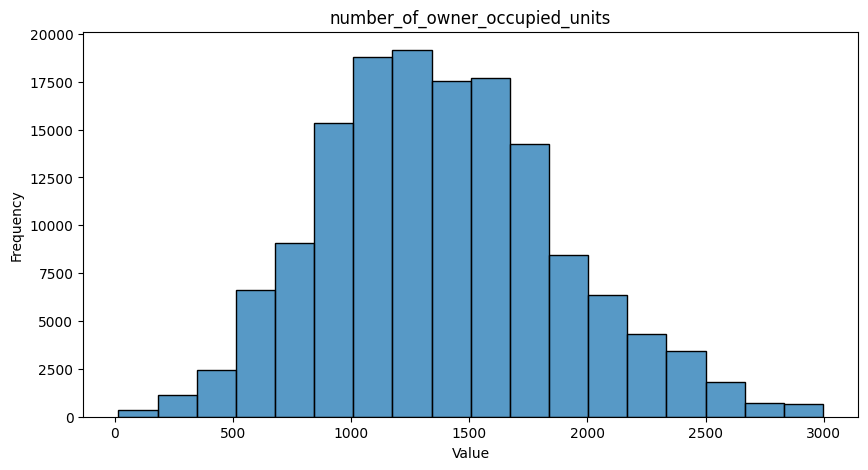

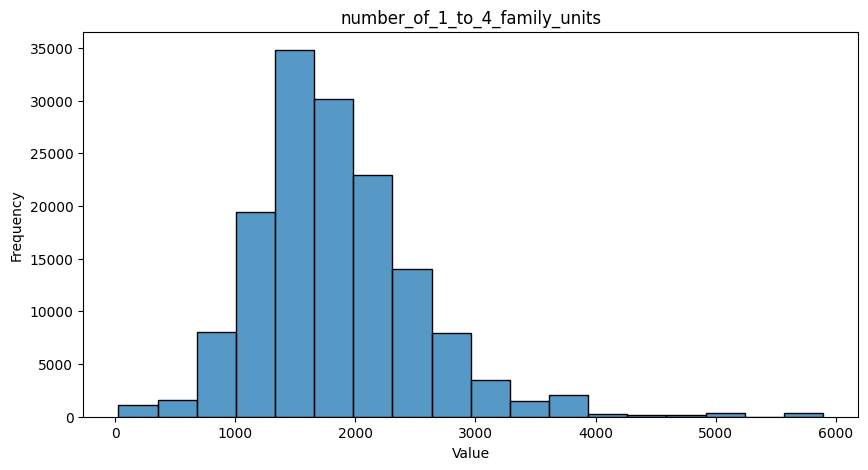

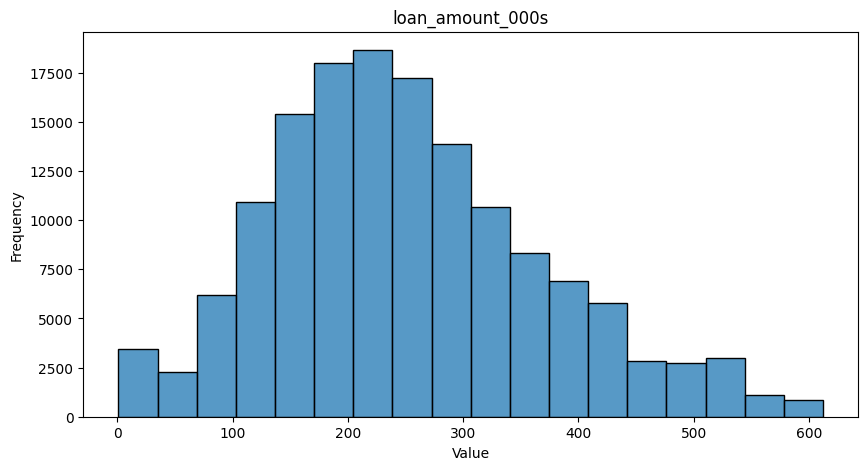

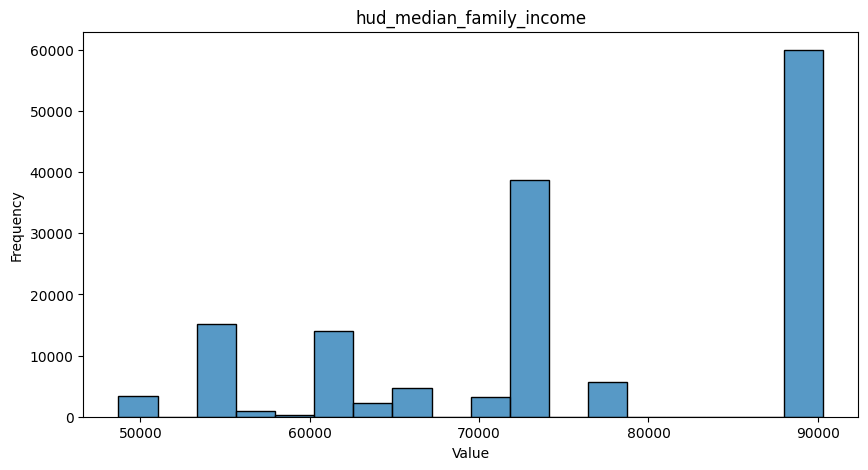

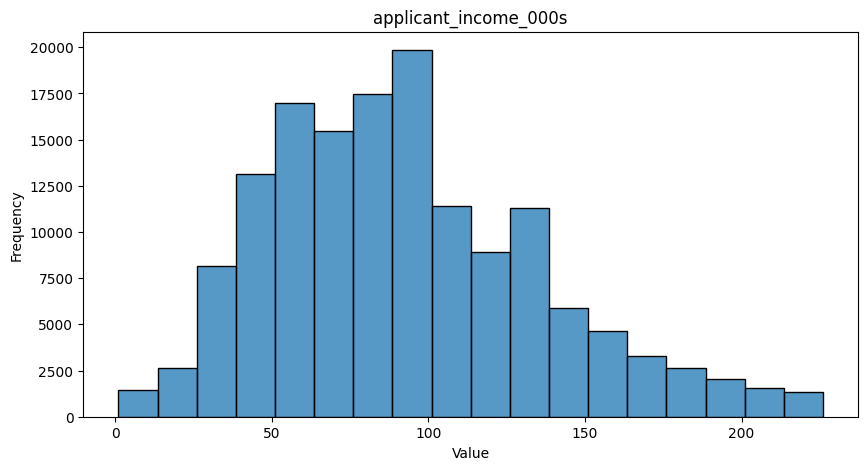

In [ ]:
for i in numeric_cols:
  plt.figure(figsize=(10,5))
  ax2 = sns.histplot(data[i], bins=18)
  ax2.set_xlabel('Value')
  ax2.set_ylabel('Frequency')
  ax2.set_title(i)

<ipython-input-50-47dfb2f022a0>:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


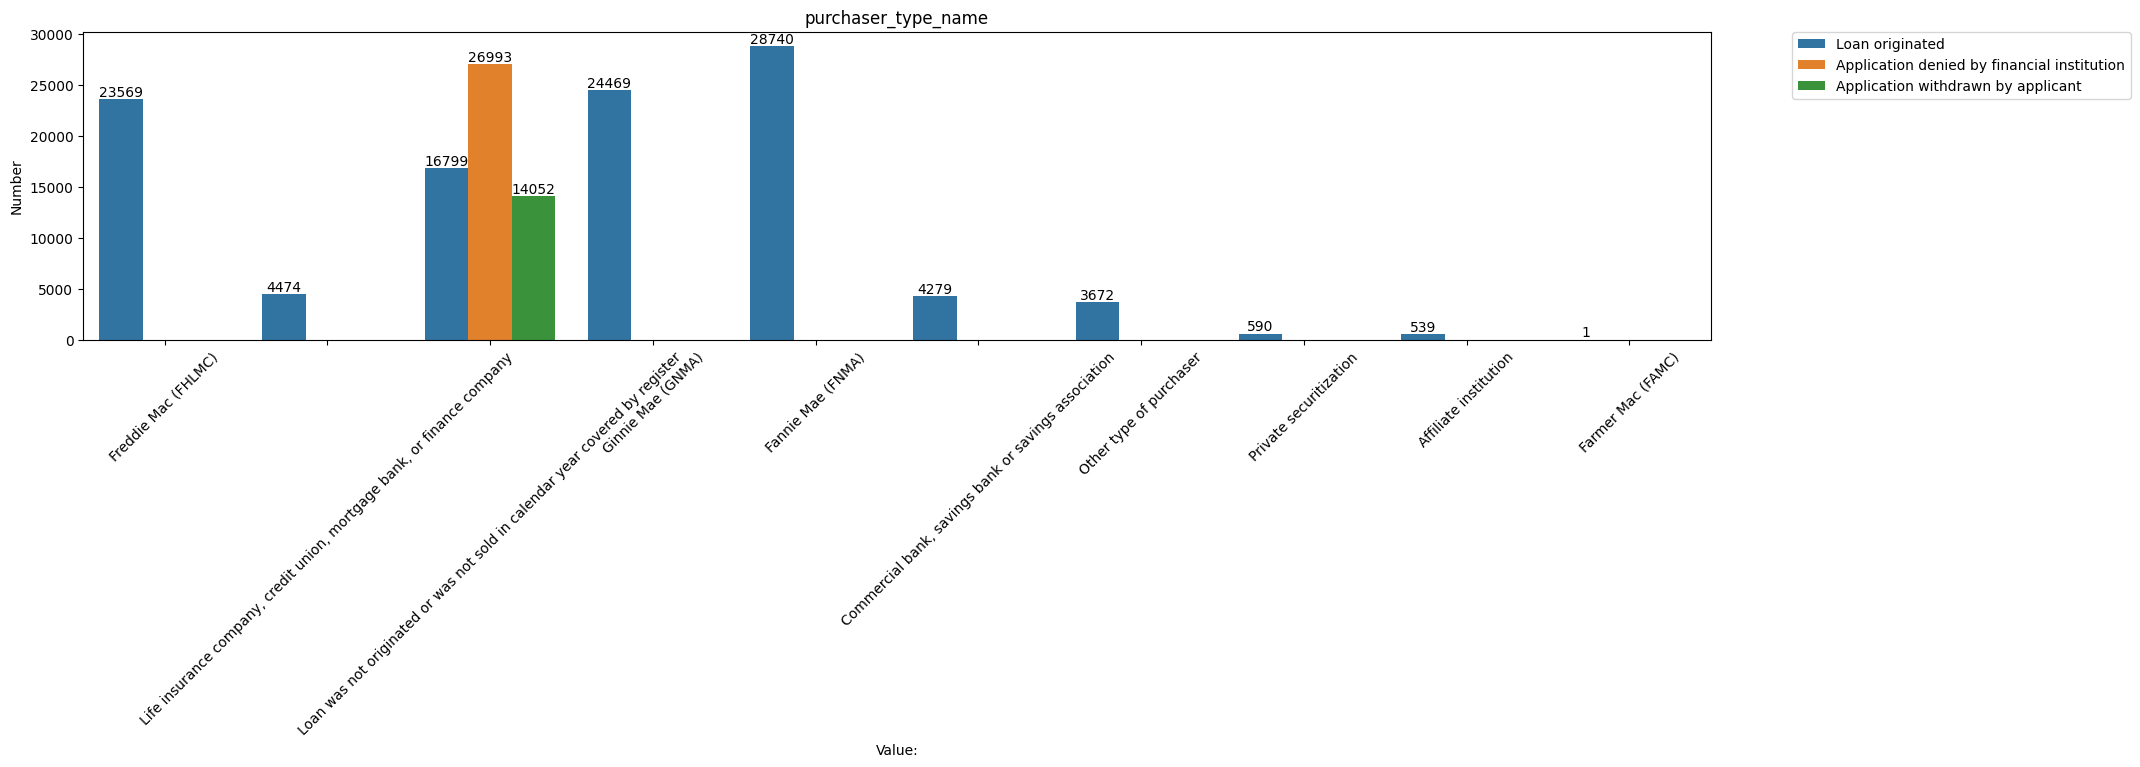

<ipython-input-50-47dfb2f022a0>:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


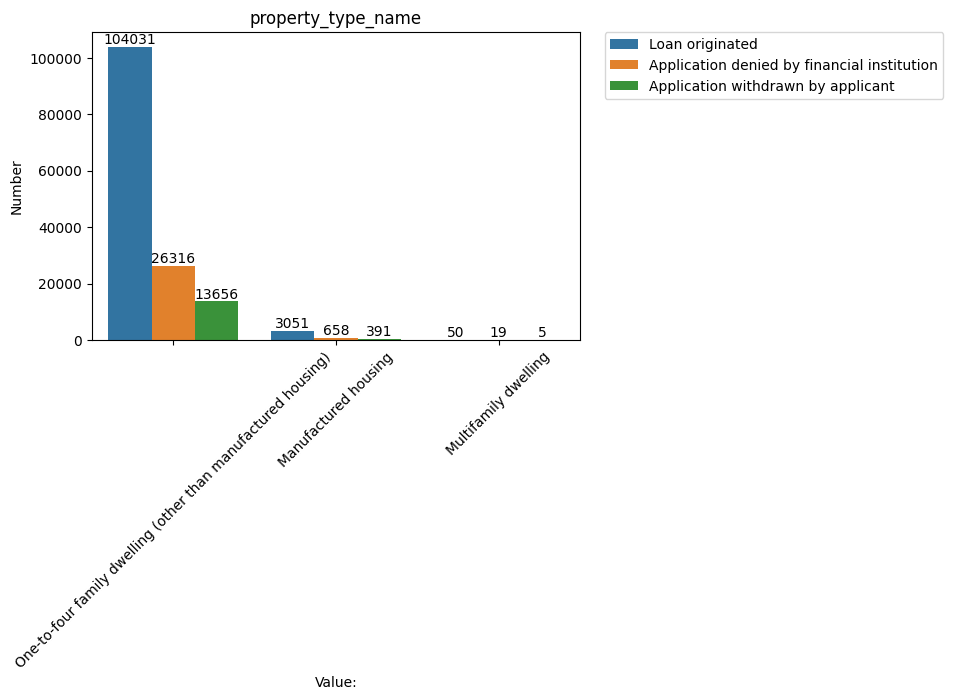

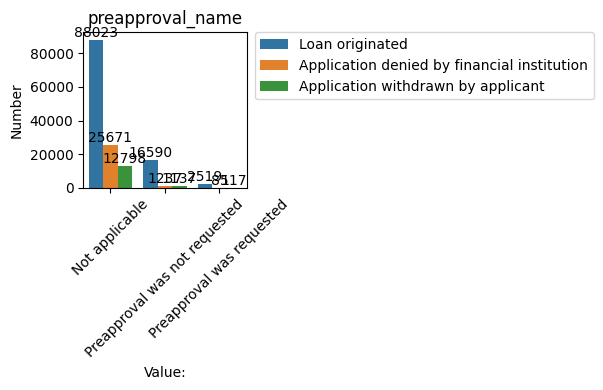

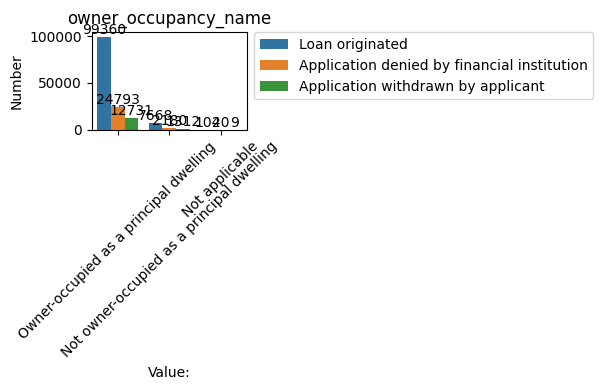

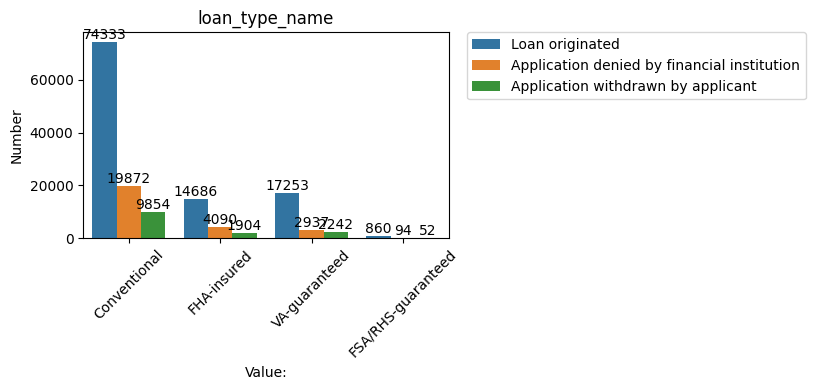

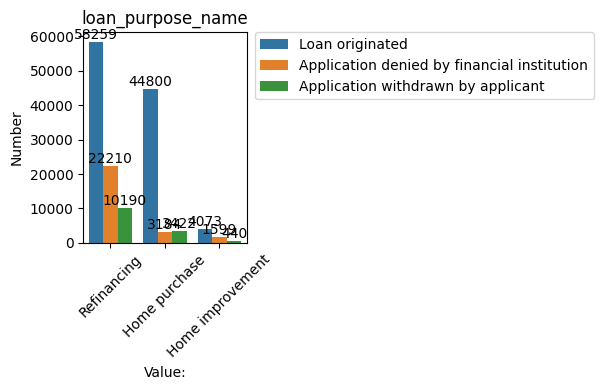

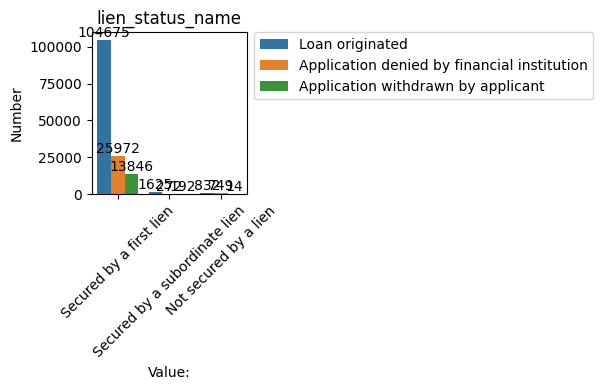

<ipython-input-50-47dfb2f022a0>:15: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


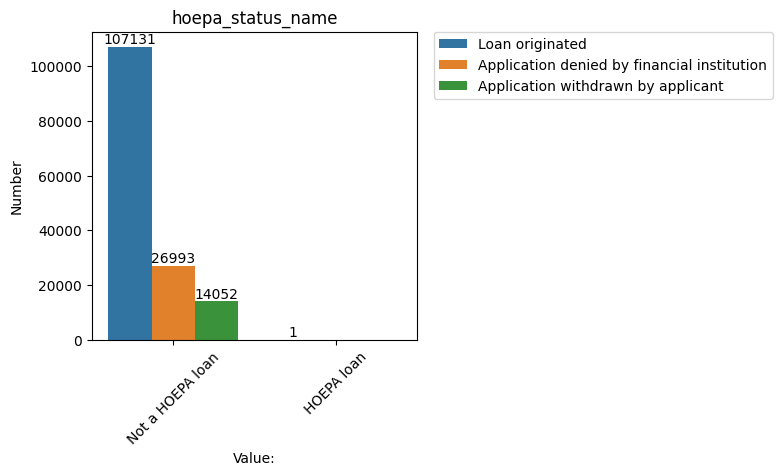

<ipython-input-50-47dfb2f022a0>:15: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


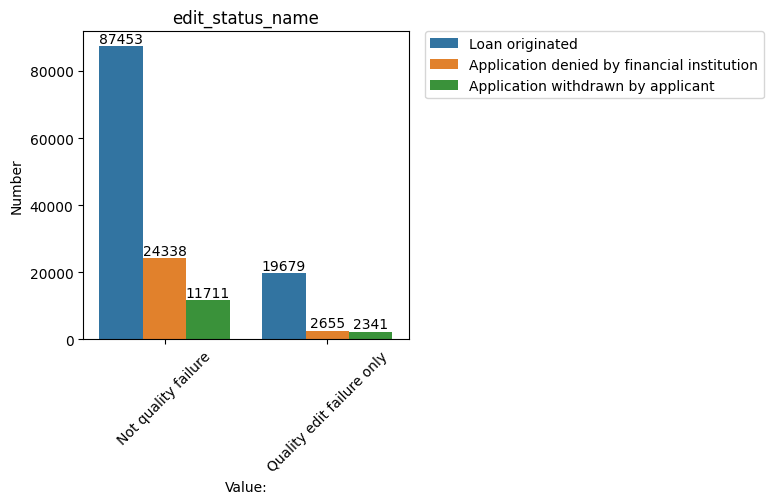

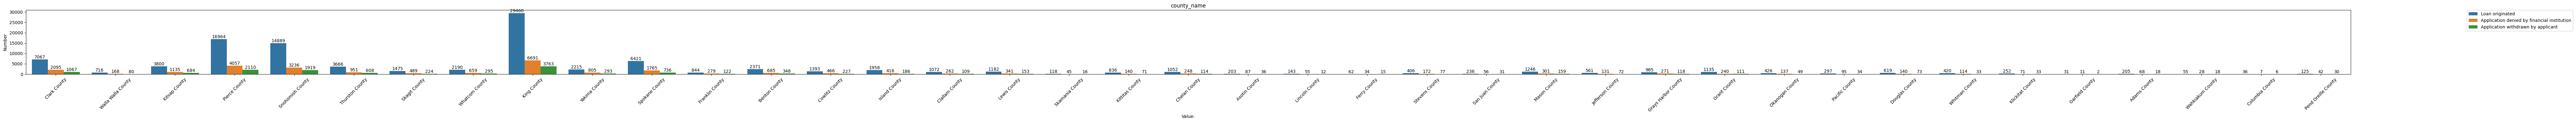

<ipython-input-50-47dfb2f022a0>:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


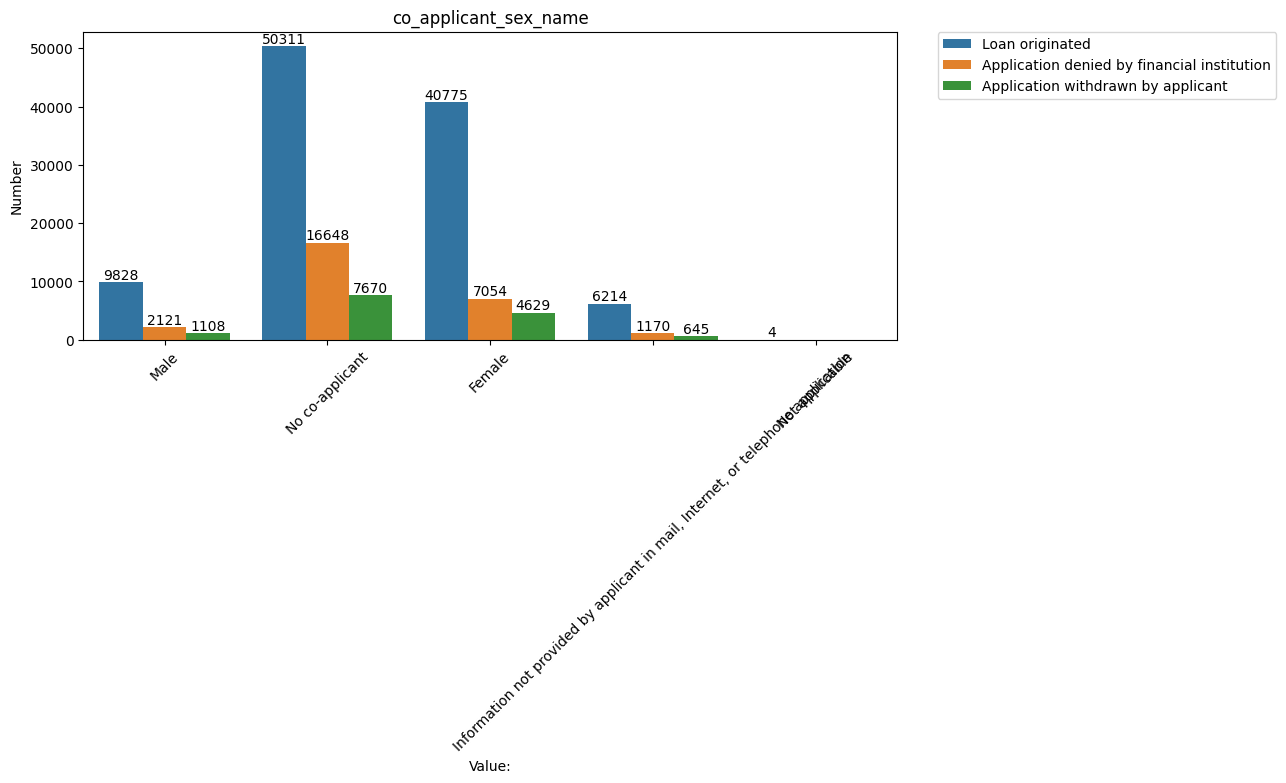

<ipython-input-50-47dfb2f022a0>:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


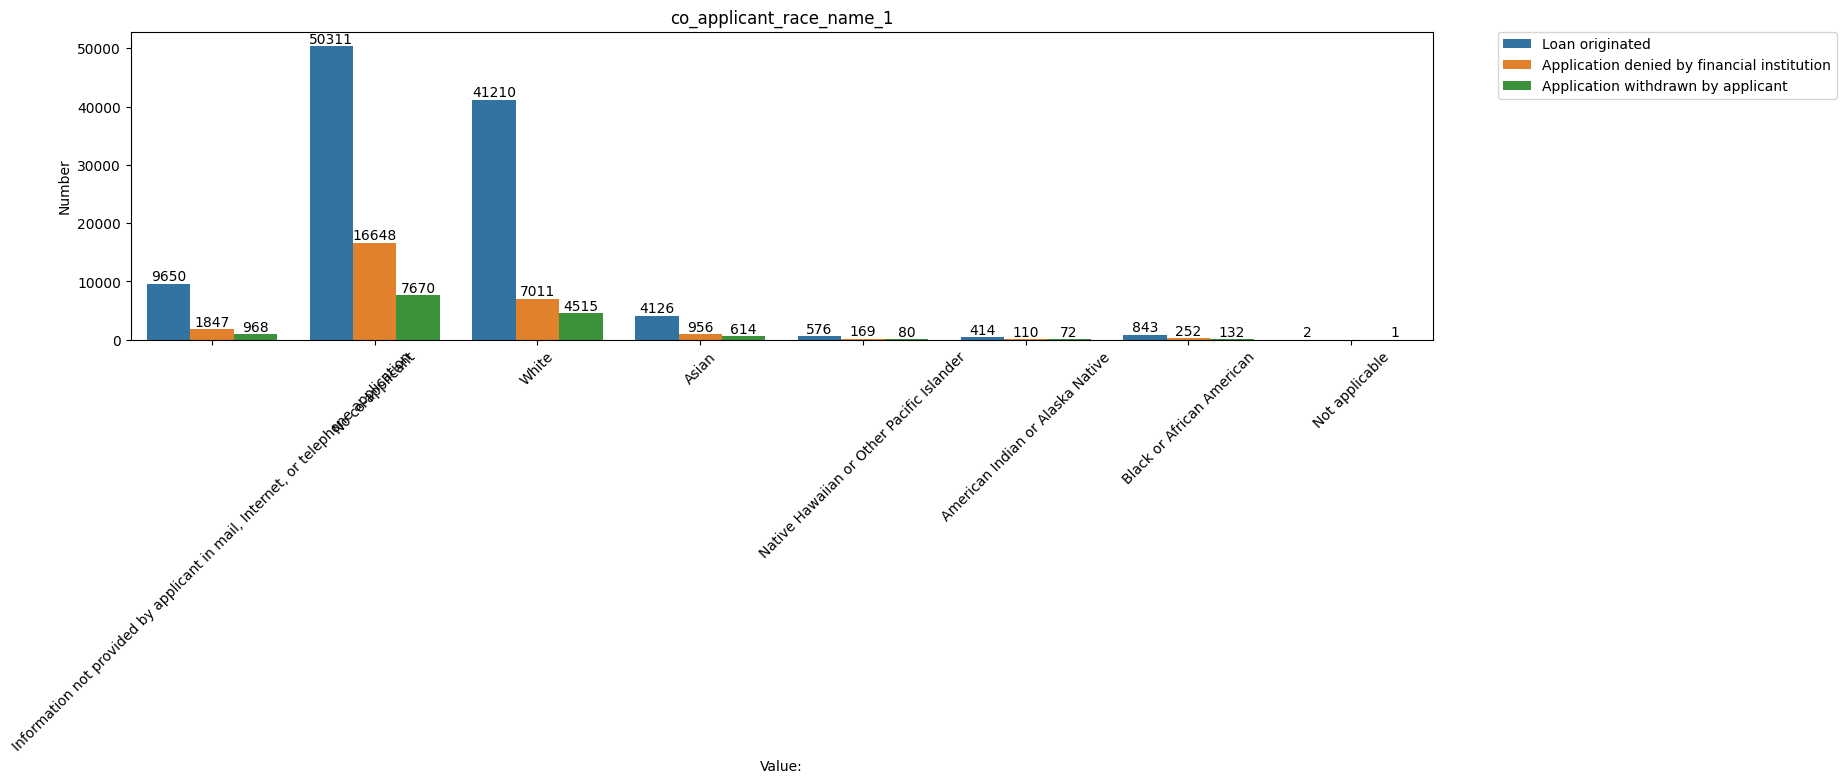

<ipython-input-50-47dfb2f022a0>:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


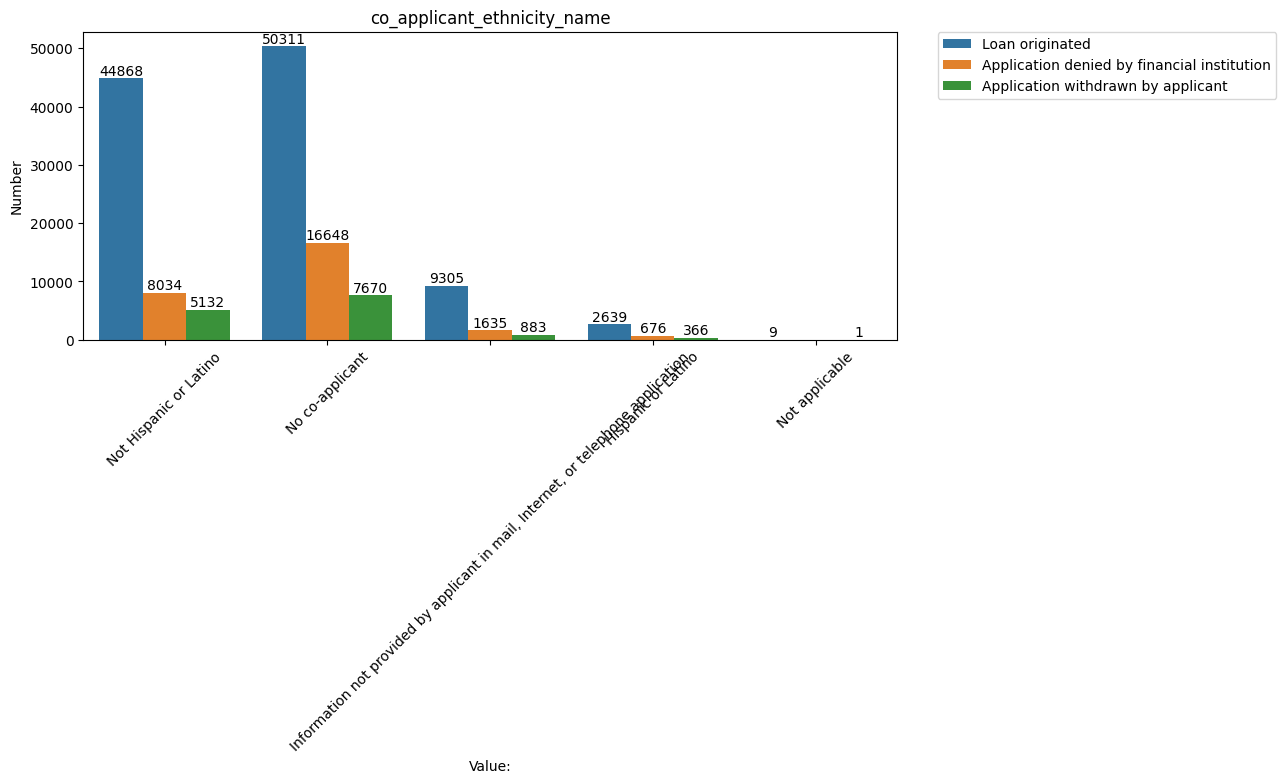

<ipython-input-50-47dfb2f022a0>:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


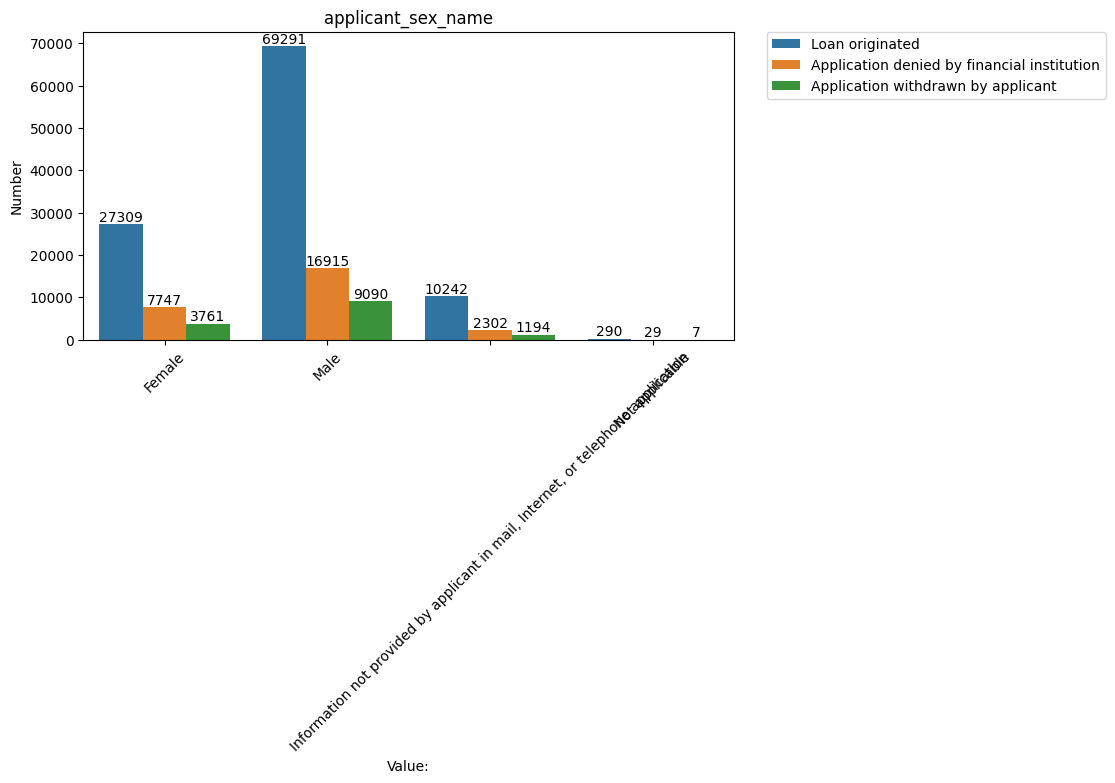

<ipython-input-50-47dfb2f022a0>:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


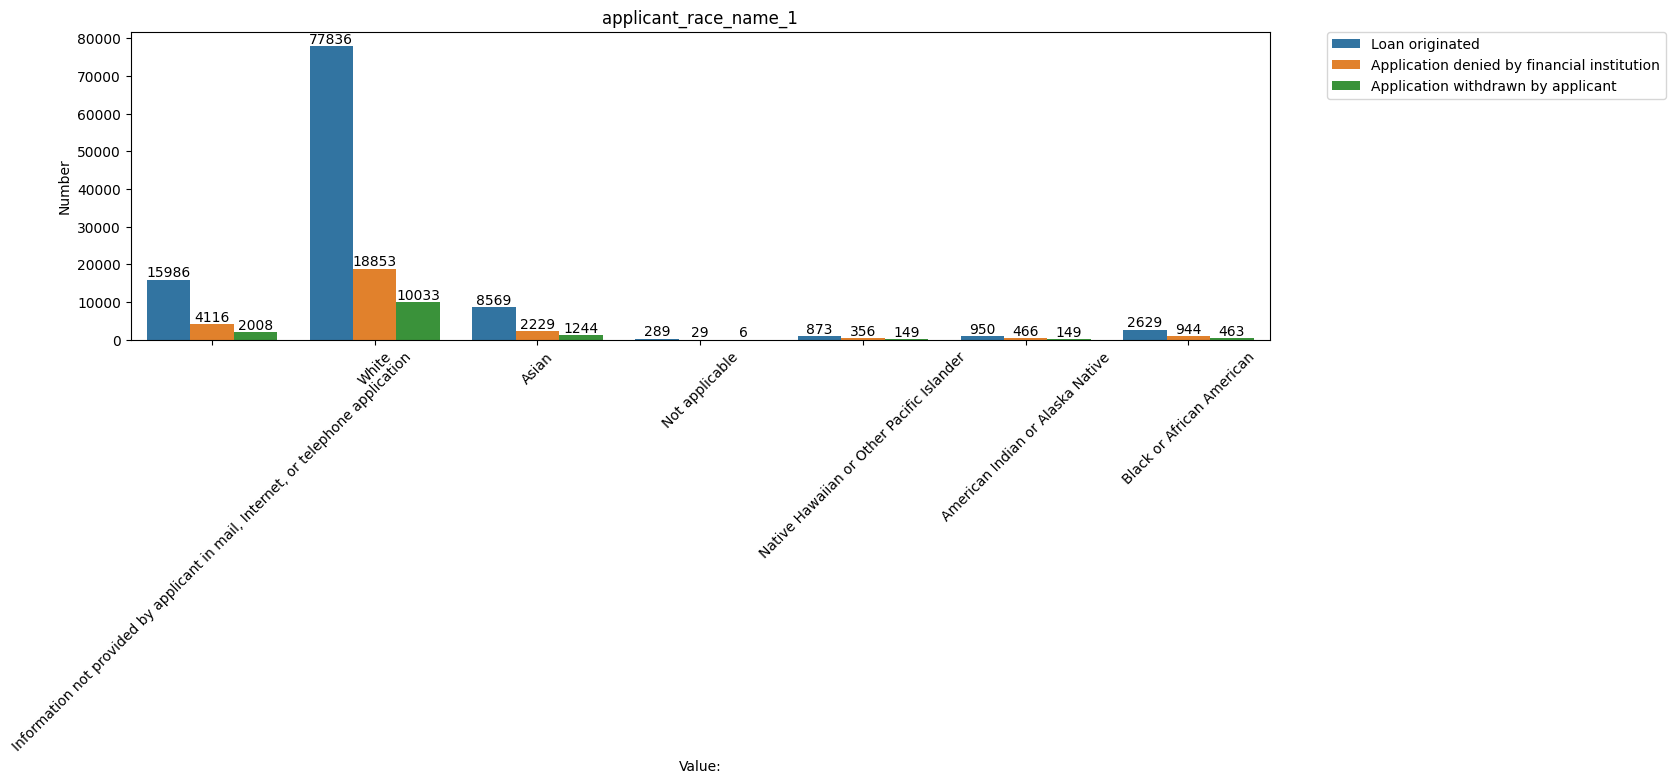

<ipython-input-50-47dfb2f022a0>:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


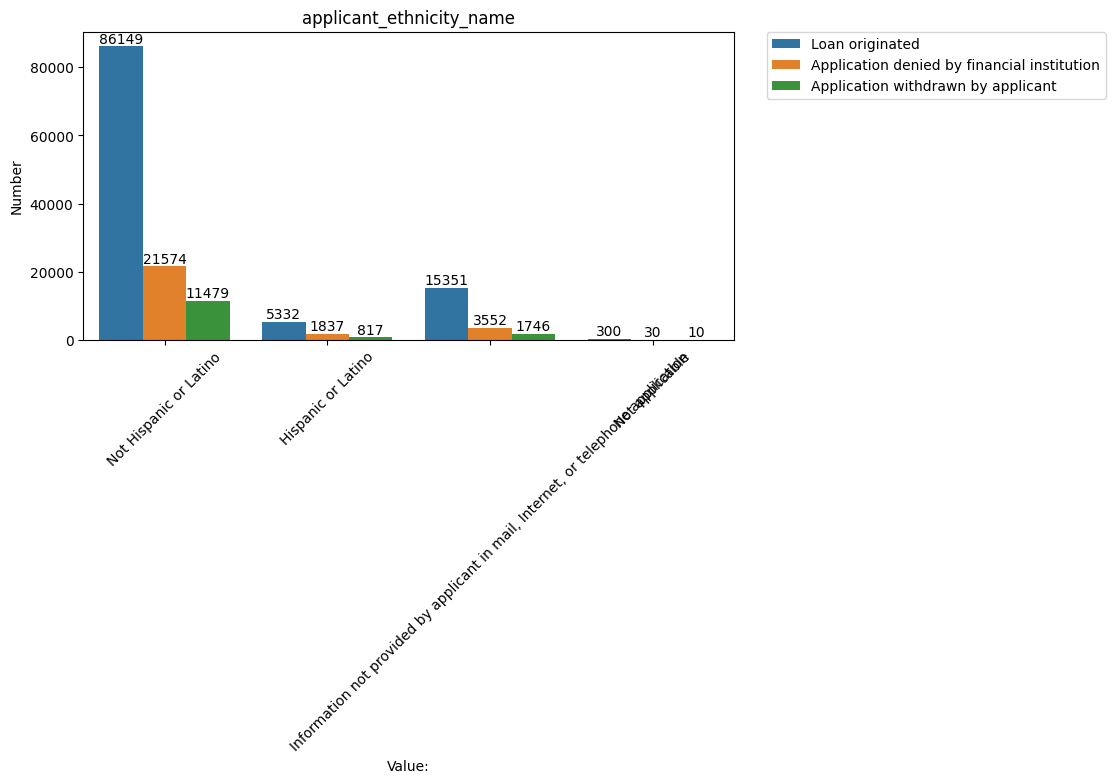

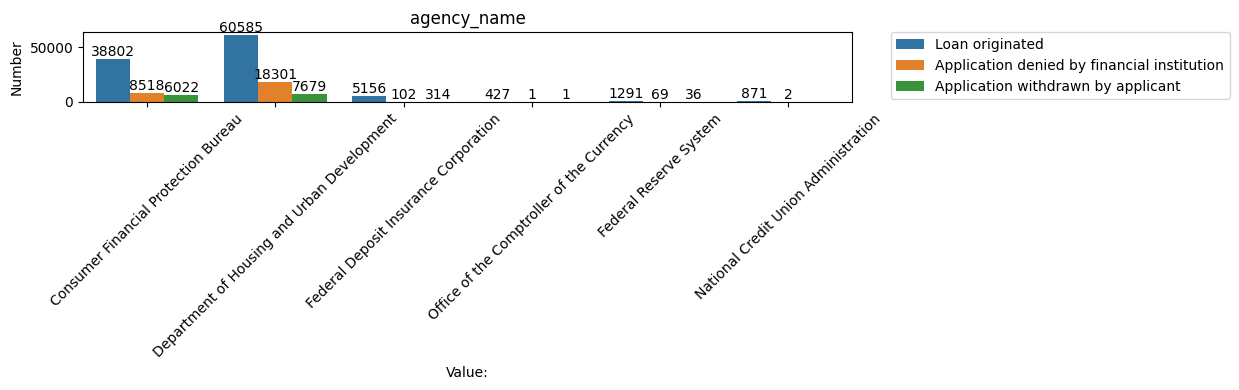

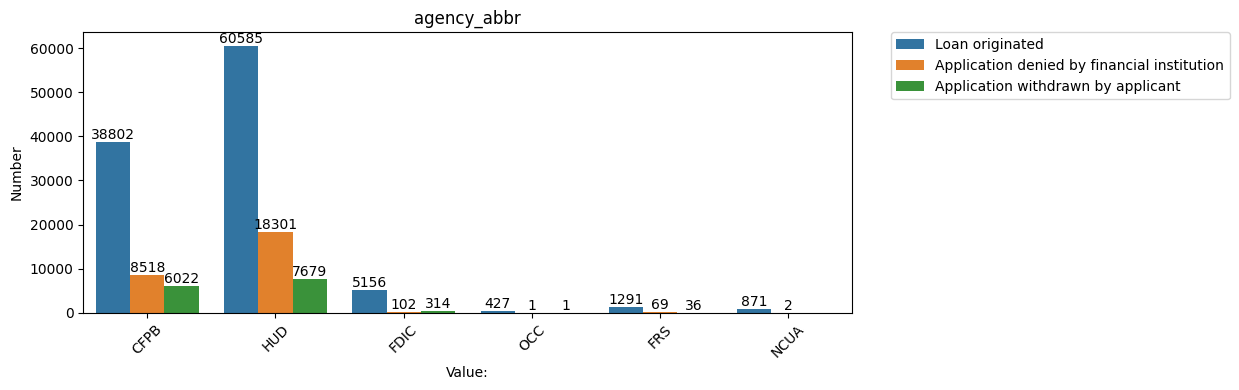

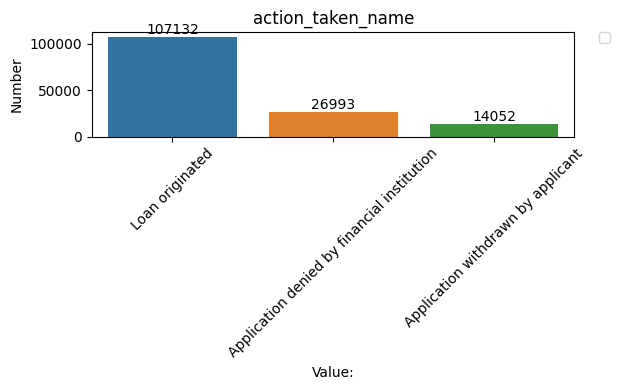

In [ ]:
for i in category_cols:
  if i == 'census_tract_number':
    continue
  else:
    ax1 = sns.countplot(x=i, hue='action_taken_name', data=data)
    ax1.set_xlabel('Value:')
    ax1.set_ylabel('Number')
    ax1.set_title(i)
    plt.xticks(rotation=45)
    plt.gcf().set_size_inches(len(data[i].unique()) * 2.1, 4)

    for container in ax1.containers:
        ax1.bar_label(container)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.tight_layout()
    plt.show()

# **ENCODING**

In [19]:
#Label encoding cho các giá trị:
for i in ['edit_status_name', 'county_name', 'preapproval_name', 'census_tract_number', 'agency_abbr', 'action_taken_name', 'respondent_id']:
  value_counts = data[i].value_counts().index
  value_to_label = {value: idx for idx, value in enumerate(value_counts)}
  data[i] = data[i].map(value_to_label)

In [20]:
#Mã hóa các giá trị trong 7 columns:
data['purchaser_type_name'] = data['purchaser_type_name'].apply(lambda x: 0 if x == 'Loan was not originated or was not sold in calendar year covered by register' else 1)
data['property_type_name'] = data['property_type_name'].apply(lambda x: 1 if x == 'Manufactured housing' else 0)
data['owner_occupancy_name'] = data['owner_occupancy_name'].apply(lambda x: 1 if x == 'Owner-occupied as a principal dwelling' else 0)
data['loan_type_name'] = data['loan_type_name'].apply(lambda x: 0 if x == 'Conventional' else 1)
data['loan_purpose_name'] = data['loan_purpose_name'].apply(lambda x: 0 if x == 'Refinancing' else 1)
data['lien_status_name'] = data['lien_status_name'].apply(lambda x: 0 if x == 'Not secured by a lien' else 1)
data['co_applicant_sex_name'] = data['co_applicant_sex_name'].apply(lambda x: 1 if x == 'Female' or x == 'Male' else 0)

In [21]:
#Viết một hàm để mapping các giá trị còn lại:
def mapping_dataframe(data, column_names=[ 'co_applicant_race_name_1', 'co_applicant_ethnicity_name', 'applicant_sex_name',
                                          'applicant_race_name_1', 'applicant_ethnicity_name']):

  co_applicant_race_name_1_mapping = {'No co-applicant': 0, 'Information not provided by applicant in mail, Internet, or telephone application': 0,
                                      'Not applicable':0, 'White': 1, 'Asian': 2, 'Black or African American': 3,
                                      'Native Hawaiian or Other Pacific Islander': 4, 'American Indian or Alaska Native': 5}
  co_applicant_ethnicity_name_mapping = {'No co-applicant': 0, 'Not applicable': 0, 'Hispanic or Latino': 2,
                                        'Not Hispanic or Latino': 1, 'Information not provided by applicant in mail, Internet, or telephone application': 1}
  applicant_sex_name_mapping = {'Male': 0, 'Female': 1, 'Not applicable': 2,
                                'Information not provided by applicant in mail, Internet, or telephone application': 2}
  applicant_race_name_1_mapping = {'Information not provided by applicant in mail, Internet, or telephone application': 0, 'Not applicable': 0,
                                   'White': 1, 'Asian': 2, 'Black or African American': 3, 'American Indian or Alaska Native': 5,
                                   'Native Hawaiian or Other Pacific Islander': 4}
  applicant_ethnicity_name_mapping = {'Not Hispanic or Latino': 1, 'Information not provided by applicant in mail, Internet, or telephone application': 1,
                                      'Hispanic or Latino': 2, 'Not applicable': 0}

  mappings = {'co_applicant_race_name_1': co_applicant_race_name_1_mapping, 'co_applicant_ethnicity_name': co_applicant_ethnicity_name_mapping,
              'applicant_sex_name': applicant_sex_name_mapping, 'applicant_race_name_1': applicant_race_name_1_mapping,
              'applicant_ethnicity_name': applicant_ethnicity_name_mapping}

  for column in column_names:
    if column in data.columns and column in mappings:
      data[column] = data[column].replace(mappings[column])

  return data

data = mapping_dataframe(data)

In [22]:
#Chuyển column này sang dạng int64
data['co_applicant_race_name_1'] = data['co_applicant_race_name_1'].astype('int64')

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148177 entries, 0 to 427458
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   tract_to_msamd_income           148177 non-null  float64
 1   population                      148177 non-null  float64
 2   minority_population             148177 non-null  float64
 3   number_of_owner_occupied_units  148177 non-null  float64
 4   number_of_1_to_4_family_units   148177 non-null  float64
 5   loan_amount_000s                148177 non-null  int64  
 6   hud_median_family_income        148177 non-null  float64
 7   applicant_income_000s           148177 non-null  float64
 8   sequence_number                 148177 non-null  int64  
 9   respondent_id                   148177 non-null  int64  
 10  purchaser_type_name             148177 non-null  int64  
 11  property_type_name              148177 non-null  int64  
 12  preapproval_name     

# **FEATURES SELECTION**

***Kiểm định Chi-squared***

In [28]:
numeric_cols = ['tract_to_msamd_income', 'population', 'minority_population', 'number_of_owner_occupied_units',
                'number_of_1_to_4_family_units', 'loan_amount_000s', 'hud_median_family_income', 'applicant_income_000s']
category_cols = data.columns.drop(numeric_cols)

In [30]:
remove_obj_cols =[]

#Chi-square test cho các cột Object so với cột Output của data
for i in category_cols:
  chi2, pval, _, _ = chi2_contingency(pd.crosstab(data[i], data['action_taken_name']))
  print(i, '---', pval)
  if pval > 0.05:
    remove_obj_cols.append(i)
  else:
    continue
print(remove_obj_cols)

sequence_number --- 0.4986181585223021
respondent_id --- 0.0
purchaser_type_name --- 0.0
property_type_name --- 0.0011710179281054422
preapproval_name --- 0.0
owner_occupancy_name --- 3.185823884130787e-21
loan_type_name --- 6.790792291892513e-41
loan_purpose_name --- 0.0
lien_status_name --- 1.75011412515159e-206
edit_status_name --- 2.4305164131198496e-246
county_name --- 4.992326105958524e-109
co_applicant_sex_name --- 0.0
co_applicant_race_name_1 --- 0.0
co_applicant_ethnicity_name --- 0.0
census_tract_number --- 1.7437036460526934e-116
applicant_sex_name --- 6.475137091068098e-31
applicant_race_name_1 --- 6.282889766198432e-70
applicant_ethnicity_name --- 8.28243722676714e-40
agency_abbr --- 0.0
action_taken_name --- 0.0
['sequence_number']


In [31]:
data = data.drop(columns = remove_obj_cols)

***Spearman correlation***

In [32]:
spear_cols = numeric_cols
spear_cols.append('action_taken_name')
spearman_df = data[spear_cols]
correlation_results = []

# Duyệt qua tất cả các cột trong DataFrame
for col in spearman_df.columns:
  if col == 'action_taken_name':
    continue
  else:
    corr, p_value = spearmanr(spearman_df[col], spearman_df['action_taken_name'])
    correlation_results.append((col, corr, p_value))

# Chuyển kết quả thành DataFrame để dễ quan sát
correlation_df = pd.DataFrame(correlation_results, columns=['Feature', 'Spearman Correlation', 'p-value'])
correlation_df = correlation_df.sort_values(by='Spearman Correlation', ascending=False)
correlation_df

,Feature,Spearman Correlation,p-value
2,minority_population,0.015361,3.350737e-09
4,number_of_1_to_4_family_units,-0.009198,3.992374e-04
1,population,-0.009861,1.471457e-04
6,hud_median_family_income,-0.018086,3.342652e-12
3,number_of_owner_occupied_units,-0.024257,9.741977e-21
0,tract_to_msamd_income,-0.053836,1.555598e-95
5,loan_amount_000s,-0.112983,0.000000e+00
7,applicant_income_000s,-0.136009,0.000000e+00


In [33]:
data = data.drop(columns  = ['minority_population', 'number_of_1_to_4_family_units', 'population', 'hud_median_family_income'])

***Corr matrix***

In [34]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,tract_to_msamd_income,number_of_owner_occupied_units,loan_amount_000s,applicant_income_000s,respondent_id,purchaser_type_name,property_type_name,preapproval_name,owner_occupancy_name,loan_type_name,loan_purpose_name,lien_status_name,edit_status_name,county_name,co_applicant_sex_name,co_applicant_race_name_1,co_applicant_ethnicity_name,census_tract_number,applicant_sex_name,applicant_race_name_1,applicant_ethnicity_name,agency_abbr,action_taken_name
tract_to_msamd_income,1.000000,0.399392,0.280424,0.225218,0.017913,0.017686,-0.006272,-0.041142,0.055511,-0.084166,-0.028546,0.013868,-0.006023,-0.023930,0.074692,0.032765,0.070122,-0.114178,-0.027035,-0.047650,-0.067348,0.042702,-0.045561
number_of_owner_occupied_units,0.399392,1.000000,0.088353,0.067365,0.009561,0.017675,0.010919,-0.006532,0.039658,-0.004511,-0.009822,0.006709,0.014225,0.078701,0.057769,0.032924,0.056811,-0.541800,-0.025465,-0.023374,-0.022500,0.011143,-0.020966
loan_amount_000s,0.280424,0.088353,1.000000,0.513558,-0.007804,0.075794,-0.139537,0.020284,0.106137,0.004942,0.074533,0.206628,-0.074142,-0.284319,0.120159,0.101757,0.114205,0.066330,-0.060574,0.018694,-0.077394,-0.020272,-0.088491
applicant_income_000s,0.225218,0.067365,0.513558,1.000000,0.021684,0.075185,-0.083806,-0.057541,-0.134239,-0.109325,-0.024482,0.024399,0.070510,-0.178226,0.231928,0.178908,0.239125,0.048324,-0.056865,-0.011776,-0.084801,0.064068,-0.105679
respondent_id,0.017913,0.009561,-0.007804,0.021684,1.000000,0.127078,0.047293,0.070568,-0.016669,0.061055,0.082011,-0.015650,0.131268,0.068525,0.033052,0.016529,0.027197,-0.035964,-0.019116,-0.006791,-0.022199,0.161470,-0.154211
purchaser_type_name,0.017686,0.017675,0.075794,0.075185,0.127078,1.000000,-0.000462,0.136067,0.031884,0.108381,0.164116,0.130223,0.071088,-0.014587,0.080088,0.043450,0.078576,-0.029547,-0.015051,-0.032241,-0.012809,-0.046595,-0.714248
property_type_name,-0.006272,0.010919,-0.139537,-0.083806,0.047293,-0.000462,1.000000,0.025889,0.026124,0.094773,0.043438,-0.026661,0.199593,0.130345,0.009546,0.002103,0.006948,-0.029584,-0.018683,-0.009546,0.015728,0.036909,-0.005345
preapproval_name,-0.041142,-0.006532,0.020284,-0.057541,0.070568,0.136067,0.025889,1.000000,0.028514,0.114726,0.495294,0.041153,-0.074116,0.053358,-0.000614,-0.013179,-0.000166,-0.039675,-0.003480,-0.011390,0.024708,-0.049750,-0.122394
owner_occupancy_name,0.055511,0.039658,0.106137,-0.134239,-0.016669,0.031884,0.026124,0.028514,1.000000,0.148533,0.001650,0.007256,-0.001191,-0.039795,0.010093,0.003147,0.011256,-0.010160,-0.026145,0.006726,0.050320,-0.032668,-0.025134
loan_type_name,-0.084166,-0.004511,0.004942,-0.109325,0.061055,0.108381,0.094773,0.114726,0.148533,1.000000,0.060439,0.067922,0.306083,0.086459,0.040792,0.033929,0.044488,-0.063216,-0.076782,0.020825,0.051639,-0.099151,-0.020134


In [36]:
data = data.drop(columns = ['co_applicant_sex_name', 'co_applicant_race_name_1'])

In [37]:
#Dữ liệu dùng để training:
data

,tract_to_msamd_income,number_of_owner_occupied_units,loan_amount_000s,applicant_income_000s,respondent_id,purchaser_type_name,property_type_name,preapproval_name,owner_occupancy_name,loan_type_name,loan_purpose_name,lien_status_name,edit_status_name,county_name,co_applicant_ethnicity_name,census_tract_number,applicant_sex_name,applicant_race_name_1,applicant_ethnicity_name,agency_abbr,action_taken_name
0,121.690002,2175.0,227,116.000000,6,1,0,0,1,0,0,1,0,3,1,108,1,0,1,1,0
1,83.370003,1268.0,240,42.000000,21,1,0,0,1,1,1,1,0,21,0,659,0,1,2,0,0
2,91.129997,1136.0,241,117.000000,105,0,0,0,1,0,0,1,0,3,1,54,0,1,1,0,0
4,162.470001,1705.0,417,114.000000,10,1,0,0,1,0,1,1,0,5,1,713,1,1,1,2,0
5,119.629997,954.0,206,98.201983,72,1,0,0,1,1,0,1,1,1,0,550,0,1,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427433,97.120003,1167.0,320,108.000000,0,0,0,0,1,0,0,1,0,9,1,337,0,1,1,1,2
427438,137.809998,2045.0,349,215.000000,0,0,0,0,1,0,0,1,0,9,1,598,0,1,1,1,2
427443,132.639999,2039.0,150,45.000000,0,0,0,0,1,0,1,1,0,9,0,5,1,1,1,1,2
427453,77.800003,762.0,125,27.000000,0,0,0,0,1,0,1,1,0,9,0,390,0,1,1,1,2


# **PREDICTION**

In [39]:
#Hàm đánh giá hiệu suất
def print_scores(y_test, y_pred):
  print(classification_report(y_test, y_pred))

#Hàm chia tập train-test và MinMax Scaler
def preprocess_data(data, test_size=0.2, random_state=42):

    # Chia tập train-test
    X = data.drop(columns=['action_taken_name'], axis=1)
    features = X.columns

    y = data['action_taken_name']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    #Standard Scaler
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test

In [40]:
X_train, X_test, y_train, y_test = preprocess_data(data)

***1.Random Forest***

*Mặc dù phần train có vẻ bị overfitting nhưng phần test vẫn khá ổn*

In [42]:
model_RF = RandomForestClassifier(n_estimators=200, random_state=42, class_weight = 'balanced')
model_RF.fit(X_train, y_train)

y_train_pred = model_RF.predict(X_train)
y_test_pred = model_RF.predict(X_test)

print_scores(y_train, y_train_pred)
print_scores(y_test, y_test_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85601
           1       1.00      1.00      1.00     21616
           2       1.00      1.00      1.00     11324

    accuracy                           1.00    118541
   macro avg       1.00      1.00      1.00    118541
weighted avg       1.00      1.00      1.00    118541

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     21531
           1       0.70      0.74      0.72      5377
           2       0.52      0.37      0.43      2728

    accuracy                           0.86     29636
   macro avg       0.72      0.69      0.70     29636
weighted avg       0.85      0.86      0.86     29636



***2.XGBOOST***

*Tốt hơn Random Forest, và không bị overfitting*

In [43]:
model_XGB = xgb.XGBClassifier(n_estimators=200, random_state=42)
model_XGB.fit(X_train, y_train)

y_train_pred = model_XGB.predict(X_train)
y_test_pred = model_XGB.predict(X_test)

print_scores(y_train, y_train_pred)
print_scores(y_test, y_test_pred)

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     85601
           1       0.82      0.87      0.84     21616
           2       0.78      0.63      0.70     11324

    accuracy                           0.92    118541
   macro avg       0.86      0.83      0.84    118541
weighted avg       0.92      0.92      0.92    118541

              precision    recall  f1-score   support

           0       0.94      0.95      0.95     21531
           1       0.70      0.75      0.73      5377
           2       0.53      0.42      0.47      2728

    accuracy                           0.87     29636
   macro avg       0.73      0.71      0.71     29636
weighted avg       0.86      0.87      0.86     29636



***3.CATBOOST***

*Vẫn như XGBOOST, không có cải thiện*

In [47]:
model_CB = CatBoostClassifier(iterations=200,random_seed=42)
model_CB.fit(X_train, y_train)

y_train_pred = model_CB.predict(X_train)
y_test_pred = model_CB.predict(X_test)

print_scores(y_train, y_train_pred)
print_scores(y_test, y_test_pred)

Learning rate set to 0.393297
0:	learn: 0.6709470	total: 323ms	remaining: 1m 4s
1:	learn: 0.5298418	total: 535ms	remaining: 52.9s
2:	learn: 0.4515096	total: 780ms	remaining: 51.2s
3:	learn: 0.4062040	total: 941ms	remaining: 46.1s
4:	learn: 0.3754055	total: 1.12s	remaining: 43.6s
5:	learn: 0.3538620	total: 1.27s	remaining: 41.1s
6:	learn: 0.3408874	total: 1.45s	remaining: 39.9s
7:	learn: 0.3324876	total: 1.6s	remaining: 38.5s
8:	learn: 0.3247381	total: 1.74s	remaining: 36.8s
9:	learn: 0.3208469	total: 1.85s	remaining: 35.1s
10:	learn: 0.3177354	total: 1.99s	remaining: 34.2s
11:	learn: 0.3147516	total: 2.12s	remaining: 33.1s
12:	learn: 0.3124206	total: 2.34s	remaining: 33.6s
13:	learn: 0.3109508	total: 2.56s	remaining: 34.1s
14:	learn: 0.3099894	total: 2.7s	remaining: 33.3s
15:	learn: 0.3092295	total: 2.86s	remaining: 32.9s
16:	learn: 0.3074880	total: 3.13s	remaining: 33.6s
17:	learn: 0.3068670	total: 3.32s	remaining: 33.5s
18:	learn: 0.3055311	total: 3.46s	remaining: 33s
19:	learn: 0.30

***4.SMOTE kết hợp XGBOOST***

In [48]:
# Áp dụng SMOTE để tăng cường lớp 1
class_counts = y_train.value_counts()
smote = SMOTE(sampling_strategy={1: class_counts[0], 2: class_counts[0]}, random_state=42)
X_train_resample, y_train_resample = smote.fit_resample(X_train, y_train)

In [50]:
model_XGB_2 = xgb.XGBClassifier(n_estimators=200, random_state=42)
model_XGB_2.fit(X_train_resample, y_train_resample)

y_train_pred = model_XGB_2.predict(X_train_resample)
y_test_pred = model_XGB_2.predict(X_test)

print_scores(y_train_resample, y_train_pred)
print_scores(y_test, y_test_pred)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96     85601
           1       0.83      0.78      0.80     85601
           2       0.79      0.85      0.82     85601

    accuracy                           0.86    256803
   macro avg       0.86      0.86      0.86    256803
weighted avg       0.86      0.86      0.86    256803

              precision    recall  f1-score   support

           0       0.96      0.93      0.95     21531
           1       0.71      0.72      0.72      5377
           2       0.47      0.55      0.50      2728

    accuracy                           0.86     29636
   macro avg       0.71      0.73      0.72     29636
weighted avg       0.87      0.86      0.86     29636



***KẾT LUẬN: Nếu ta sử dụng XGBOOST thông thường thì mô hình sẽ tốt nhất, những thuật toán khác không có cải thiện đáng kể cho lắm***